In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from collections import Counter
import re

In [5]:
# reading data from csv
data = pd.read_csv('/content/raw_analyst_ratings.csv')

In [6]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


### Descriptive Statistics of data

In [ ]:
# statistics for the length of headlines.
data['headline_length'] = data['headline'].str.len()
print(data['headline_length'].describe())

count    45231.000000
mean        73.613517
std         40.715884
min          7.000000
25%         47.000000
50%         65.000000
75%         88.000000
max        458.000000
Name: headline_length, dtype: float64


### Summary of `headline_length` Data

- **Total Entries (count):** 45,231  
- **Mean Length:** 73.61 characters  
- **Standard Deviation (std):** 40.72 characters  
- **Minimum Length (min):** 7 characters  
- **25th Percentile (25%):** 47 characters  
- **Median (50%):** 65 characters  
- **75th Percentile (75%):** 88 characters  
- **Maximum Length (max):** 458 characters  

This indicates that most headlines are between 47 and 88 characters long, with some outliers reaching up to 458 characters.


In [8]:
# Count articles per publisher
publisher_counts = data['publisher'].value_counts()

# Print the results
print(publisher_counts)

# To identify the most active publishers:
print("\nMost active publishers:")
print(publisher_counts.head(10))  # Print top 10

publisher
Paul Quintaro        7519
Lisa Levin           6280
Benzinga Newsdesk    4778
Charles Gross        2948
Monica Gerson        2873
                     ... 
Jason Raznick1          1
Spencer Purdy           1
Activist Stocks         1
Rahul Kaundal           1
Fred Mason              1
Name: count, Length: 427, dtype: int64

Most active publishers:
publisher
Paul Quintaro        7519
Lisa Levin           6280
Benzinga Newsdesk    4778
Charles Gross        2948
Monica Gerson        2873
Eddie Staley         1797
Hal Lindon           1638
Benzinga Staff       1337
Juan Lopez            939
Vick Meyer            877
Name: count, dtype: int64


### Publisher Activity Summary

- **Total Unique Publishers:** 427  
- **Top 10 Most Active Publishers:**  
  1. **Paul Quintaro:** 7,519 articles  
  2. **Lisa Levin:** 6,280 articles  
  3. **Benzinga Newsdesk:** 4,778 articles  
  4. **Charles Gross:** 2,948 articles  
  5. **Monica Gerson:** 2,873 articles  
  6. **Eddie Staley:** 1,797 articles  
  7. **Hal Lindon:** 1,638 articles  
  8. **Benzinga Staff:** 1,337 articles  
  9. **Juan Lopez:** 939 articles  
  10. **Vick Meyer:** 877 articles  

This shows that a small group of publishers contributes a significant portion of the content.


In [15]:
# Convert the 'date' column to datetime objects if it's not already
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d %H:%M:%S%z',errors = 'coerce')

# Group by date and count the number of articles
daily_counts = data.groupby('date').size()

# Print the daily counts
print("\nDaily Article Counts:")
print(daily_counts)

# Analyze trends (example: find days with the highest number of articles)
top_days = daily_counts.nlargest(5) # Top 5 days
print("\nTop 5 days with most articles:")
print(top_days)


# Example: Weekly Trends
weekly_counts = data.groupby(data['date'].dt.isocalendar().week).size()
print("\nWeekly Article Counts:")
print(weekly_counts)

# Example: Monthly Trends
monthly_counts = data.groupby(data['date'].dt.to_period('M')).size()
print("\nMonthly Article Counts:")
monthly_counts


Daily Article Counts:
date
2011-07-22 19:18:44-04:00    1
2011-07-25 19:59:25-04:00    1
2011-07-27 14:11:59-04:00    1
2011-07-28 19:13:28-04:00    1
2011-08-01 20:29:34-04:00    1
                            ..
2020-06-10 11:21:01-04:00    1
2020-06-10 11:33:26-04:00    1
2020-06-10 15:09:50-04:00    1
2020-06-10 15:13:10-04:00    1
2020-06-10 15:17:32-04:00    1
Length: 1293, dtype: int64

Top 5 days with most articles:
date
2020-03-12 12:10:12-04:00    14
2020-03-19 10:49:42-04:00    12
2020-05-13 11:51:22-04:00     6
2020-05-14 14:25:39-04:00     6
2020-06-05 10:30:54-04:00     6
dtype: int64

Weekly Article Counts:
week
1      10
2      14
3      11
4      18
5      23
6      19
7      14
8      18
9      30
10     18
11     31
12     37
13     38
14     31
15     17
16     46
17     46
18     62
19    111
20    109
21     95
22     69
23    125
24     74
25      1
26      6
27      8
28      2
29     10
30      7
31     22
32     17
33     20
34     10
35     17
36     13
37   

<ipython-input-15-7a0ffde2efd1>:23: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts = data.groupby(data['date'].dt.to_period('M')).size()


,0
date,
2011-07,4
2011-08,3
2011-09,1
2011-10,1
2012-01,1
...,...
2020-02,30
2020-03,92
2020-04,128


### Articles Published Over Time

- **Earliest Recorded Month:** July 2011  
- **Latest Recorded Month:** June 2020  

#### Key Monthly Highlights:
- **2011:**
  - July: 4 articles  
  - August: 3 articles  
  - September: 1 article  
  - October: 1 article  

- **2020:**
  - February: 30 articles  
  - March: 92 articles  
  - April: 128 articles  
  - May: 346 articles (highest)  
  - June: 187 articles  

This indicates a significant increase in article publication from 2011 to 2020, peaking in May 2020.


### Text Analysis(Sentiment analysis & Topic Modeling)

In [16]:
def analyze_sentiment(headline):
    analysis = TextBlob(headline)
    polarity = analysis.sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

In [20]:
data['sentiment'] = data['headline'].astype(str).apply(analyze_sentiment)

sentiment_counts = data['sentiment'].value_counts()
print("\nOverall Sentiment Distribution:\n", sentiment_counts)
sentiment_over_time = data.groupby(data['date'].dt.date)['sentiment'].value_counts().unstack().fillna(0)
print("\nSentiment over Time:\n", sentiment_over_time)


Overall Sentiment Distribution:
 sentiment
neutral     34015
positive     8613
negative     2603
Name: count, dtype: int64

Sentiment over Time:
 sentiment   negative  neutral  positive
date                                   
2011-07-22       0.0      0.0       1.0
2011-07-25       0.0      0.0       1.0
2011-07-27       0.0      1.0       0.0
2011-07-28       0.0      0.0       1.0
2011-08-01       0.0      0.0       1.0
...              ...      ...       ...
2020-06-05       0.0     17.0      17.0
2020-06-07       0.0      2.0       0.0
2020-06-08       0.0     12.0      13.0
2020-06-09       0.0     17.0       2.0
2020-06-10       1.0     18.0       6.0

[493 rows x 3 columns]


In [21]:
def analyze_keywords(headlines):
    """Identifies common keywords and phrases from a list of headlines."""

    keywords = []
    for headline in headlines:
        # Convert to lowercase for consistency
        headline = headline.lower()

        # Split into words
        words = headline.split()

        # Remove stopwords
        stopwords = set(['the', 'a', 'an', 'and', 'in', 'on', 'to', 'of', 'for', 'is', 'are', 'with', 'at', 'by'])
        filtered_words = [w for w in words if w not in stopwords and len(w) > 2]  # Remove short words too

        keywords.extend(filtered_words)

        # Look for specific phrases
        phrases = ["fda approval", "price target", "earnings report", "new product launch", "market share"]
        for phrase in phrases:
          if phrase in headline:
              keywords.append(phrase)

    # Count keyword frequencies
    word_counts = Counter(keywords)

    # Get the most frequent keywords
    return word_counts.most_common(20)  # Return top 20

# Apply keyword analysis to the 'headline' column
common_keywords = analyze_keywords(data['headline'])

print("\nMost Frequent Keywords and Phrases:")
for keyword, count in common_keywords:
    print(f"- {keyword}: {count}")


Most Frequent Keywords and Phrases:
- stocks: 5240
- eps: 4002
- from: 3882
- shares: 3790
- reports: 3423
- market: 3004
- earnings: 2775
- update:: 2709
- top: 2506
- announces: 2451
- sales: 2204
- raises: 2084
- trading: 2029
- american: 2015
- price: 1946
- downgrades: 1921
- target: 1920
- maintains: 1878
- benzinga's: 1747
- price target: 1724


## Time Series Analysis

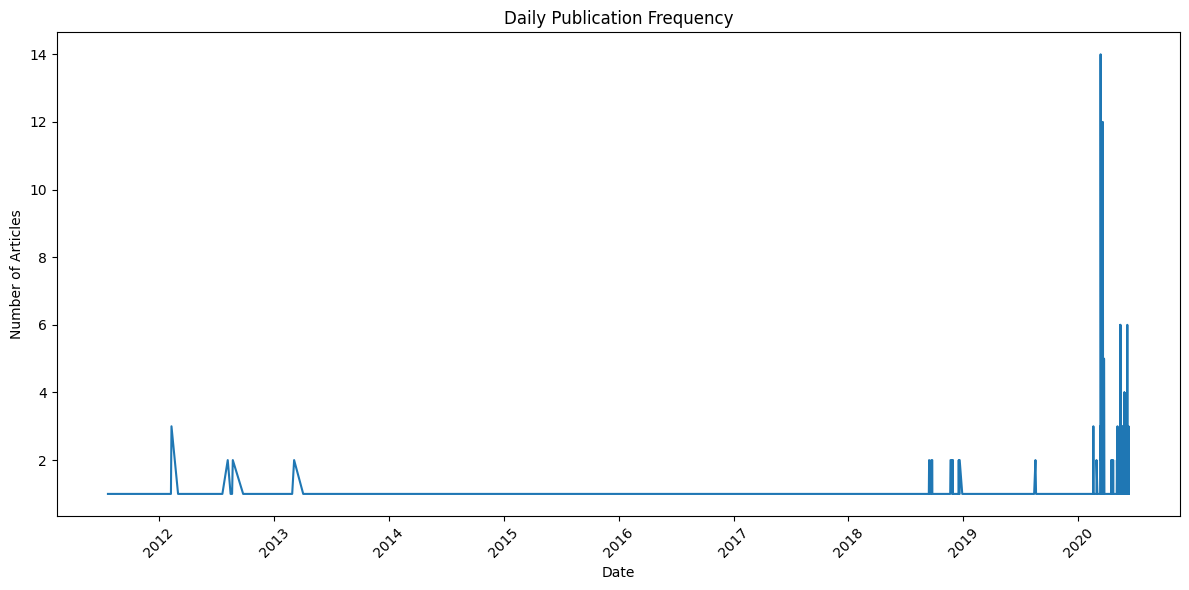

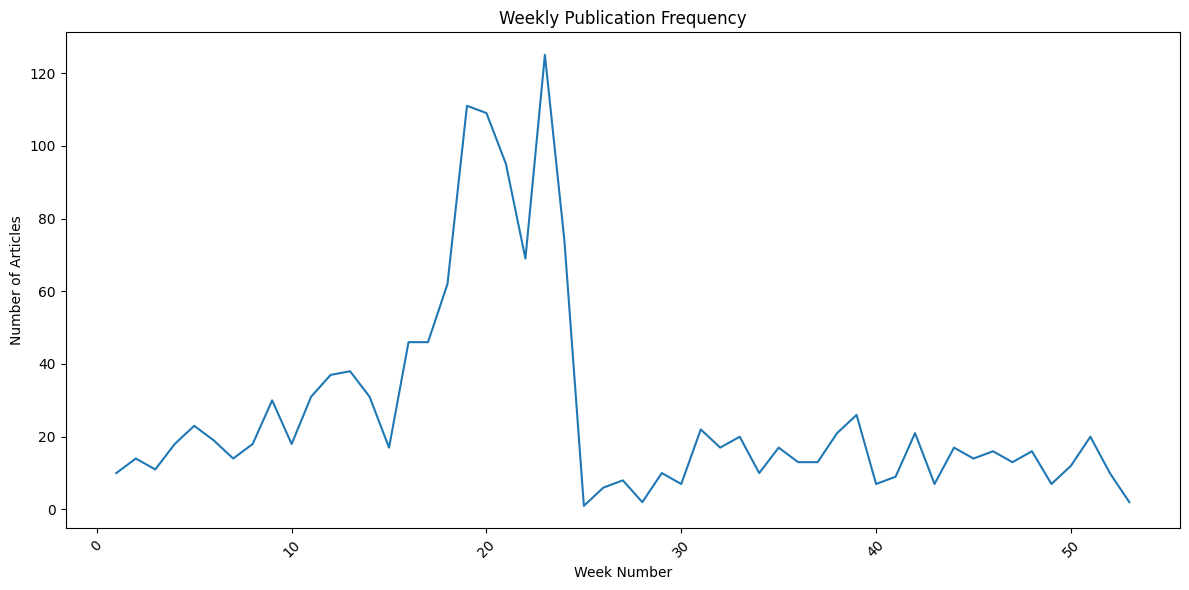

In [26]:
# Plotting Daily Trends
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Daily Publication Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Weekly Trends
plt.figure(figsize=(12, 6))
plt.plot(weekly_counts.index, weekly_counts.values)
plt.xlabel('Week Number')
plt.ylabel('Number of Articles')
plt.title('Weekly Publication Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

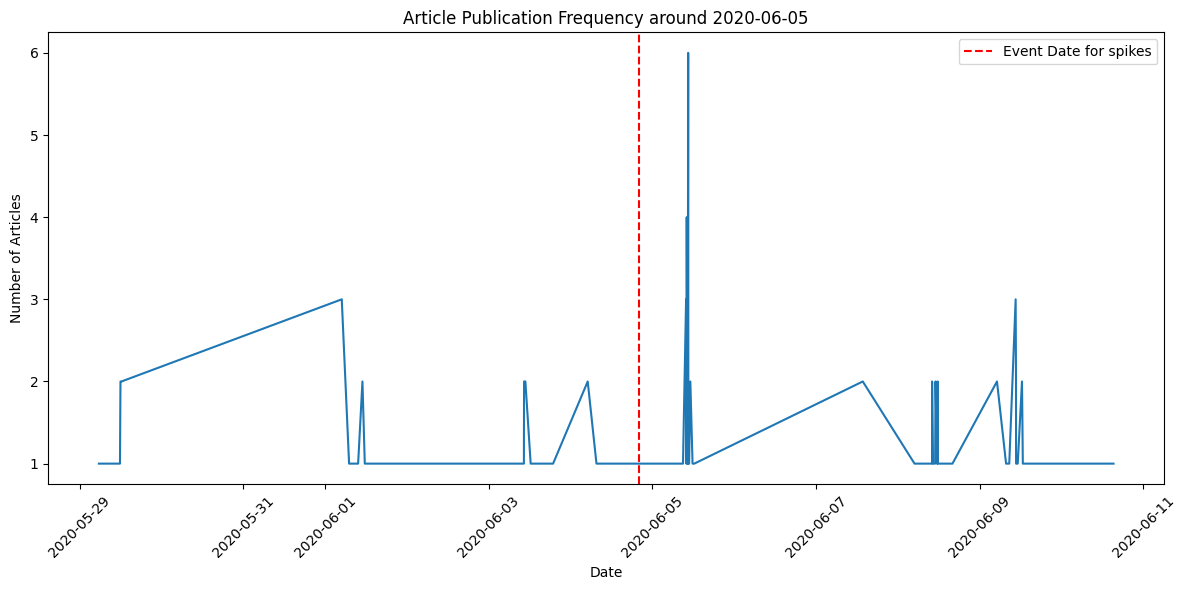

In [31]:
event_date = pd.to_datetime('2020-06-05')

# Create a time window around the event date (e.g., +/- 7 days)
time_window = pd.Timedelta(days=7)
start_date = event_date - time_window
end_date = event_date + time_window
start_date = pd.Timestamp(start_date, tz='UTC-04:00')
end_date = pd.Timestamp(end_date, tz='UTC-04:00')
# Filter the data for the time window
event_period_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Group by date and count articles
event_daily_counts = event_period_data.groupby('date').size()

# Plot the daily counts with a vertical line marking the event date
plt.figure(figsize=(12, 6))
plt.plot(event_daily_counts.index, event_daily_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title(f'Article Publication Frequency around {event_date.strftime("%Y-%m-%d")}')
plt.axvline(x=event_date, color='red', linestyle='--', label='Event Date for spikes')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

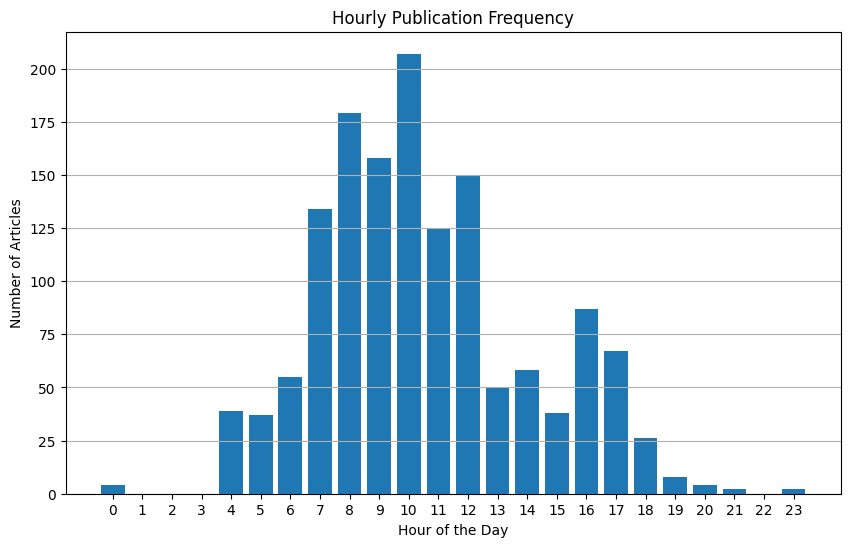

In [32]:
# Analysis of publishing times might reveal if there’s a specific time when most news is released, which could be crucial for traders and automated trading systems.


# Extract hour from the datetime
data['hour'] = data['date'].dt.hour

# Group by hour and count the number of articles published in each hour
hourly_counts = data.groupby('hour').size()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.title('Hourly Publication Frequency')
plt.xticks(range(24))  # Show all hours on the x-axis
plt.grid(True, axis='y') # Add a horizontal grid for better readability
plt.show()

## Publisher Analysis

In [33]:
# Which publishers contribute most to the news feed?

# The publisher_counts variable already contains the counts.
# Accessing the top publishers:
top_publishers = publisher_counts.head(10)
print("Top 10 Publishers:")
top_publishers

Top 10 Publishers:


,count
publisher,
Paul Quintaro,7519
Lisa Levin,6280
Benzinga Newsdesk,4778
Charles Gross,2948
Monica Gerson,2873
Eddie Staley,1797
Hal Lindon,1638
Benzinga Staff,1337
Juan Lopez,939


### Article Counts by Top Publishers

| **Publisher**         | **Article Count** |
|------------------------|-------------------|
| Paul Quintaro         | 7,519             |
| Lisa Levin            | 6,280             |
| Benzinga Newsdesk     | 4,778             |
| Charles Gross         | 2,948             |
| Monica Gerson         | 2,873             |
| Eddie Staley          | 1,797             |
| Hal Lindon            | 1,638             |
| Benzinga Staff        | 1,337             |
| Juan Lopez            | 939               |
| Vick Meyer            | 877               |

The majority of articles are authored by a few prolific publishers, led by **Paul Quintaro** and **Lisa Levin**.


In [34]:
# is there a difference in the type of news they report?

# Publisher Sentiment Analysis
publisher_sentiment = data.groupby('publisher')['sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Display the sentiment distribution for each publisher
print("\nSentiment Distribution by Publisher:\n", publisher_sentiment)

# Example: Compare sentiment for two publishers
publisher1 = 'benzinga.com'
publisher2 = 'seekingalpha.com'


if publisher1 in publisher_sentiment.index and publisher2 in publisher_sentiment.index:
    print(f"\nSentiment comparison for {publisher1} and {publisher2}:\n")
    print(publisher_sentiment.loc[[publisher1, publisher2], :])


    # Plotting for comparison
    publisher_sentiment.loc[[publisher1, publisher2], :].plot(kind='bar', figsize=(10, 6))
    plt.title(f'Sentiment Comparison: {publisher1} vs {publisher2}')
    plt.xlabel('Publisher')
    plt.ylabel('Proportion of Sentiment')
    plt.xticks(rotation=0) # Ensure x-axis labels are readable
    plt.legend(title='Sentiment')
    plt.show()
else:
    print(f"One or both publishers ({publisher1}, {publisher2}) not found in the dataset.")


# Keyword analysis by publisher:
def analyze_keywords_by_publisher(df):
    publisher_keywords = {}
    for publisher, group in df.groupby('publisher'):
        keywords = analyze_keywords(group['headline'])
        publisher_keywords[publisher] = keywords
    return publisher_keywords

publisher_keyword_analysis = analyze_keywords_by_publisher(data)


# Print or further analyze the publisher_keyword_analysis
# Example: Display top keywords for the top 2 publishers
top_publishers = publisher_counts.index[:2]

for publisher in top_publishers:
    if publisher in publisher_keyword_analysis:
      print(f"\nTop Keywords for {publisher}:")
      for keyword, count in publisher_keyword_analysis[publisher]:
          print(f"- {keyword}: {count}")
    else:
        print(f"No keyword data found for {publisher}")


Sentiment Distribution by Publisher:
 sentiment                  negative   neutral  positive
publisher                                              
Aaron Levitt               0.000000  1.000000  0.000000
Abe Raymond                0.108696  0.782609  0.108696
Abhi Rao                   0.000000  0.500000  0.500000
Above Average Odds         0.000000  0.666667  0.333333
Activist Stocks            0.000000  1.000000  0.000000
...                             ...       ...       ...
tradermark                 0.145455  0.618182  0.236364
vishwanath@benzinga.com    0.000000  0.945946  0.054054
vivek.proactive@gmail.com  0.000000  1.000000  0.000000
wallstreet1928             0.000000  1.000000  0.000000
webmaster                  0.080893  0.792190  0.126918

[427 rows x 3 columns]
One or both publishers (benzinga.com, seekingalpha.com) not found in the dataset.

Top Keywords for Paul Quintaro:
- eps: 1828
- reports: 1710
- from: 971
- est: 900
- sales: 870
- shares: 781
- est.: 753
- an

### Sentiment Distribution by Publisher

| **Publisher**                 | **Negative** | **Neutral** | **Positive** |
|-------------------------------|--------------|-------------|--------------|
| Aaron Levitt                  | 0.00         | 1.00        | 0.00         |
| Abe Raymond                   | 0.11         | 0.78        | 0.11         |
| Abhi Rao                      | 0.00         | 0.50        | 0.50         |
| Above Average Odds            | 0.00         | 0.67        | 0.33         |
| Activist Stocks               | 0.00         | 1.00        | 0.00         |
| ...                           | ...          | ...         | ...          |
| tradermark                    | 0.15         | 0.62        | 0.24         |
| vishwanath@benzinga.com       | 0.00         | 0.95        | 0.05         |
| vivek.proactive@gmail.com     | 0.00         | 1.00        | 0.00         |
| wallstreet1928                | 0.00         | 1.00        | 0.00         |
| webmaster                     | 0.08         | 0.79        | 0.13         |

This table highlights the sentiment distribution for articles by different publishers. Most publishers exhibit a strong neutral sentiment, with varying levels of negative and positive sentiment.


In [ ]:
# If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.
def extract_domain(email):
    try:
        return email.split('@')[1]
    except:
        return None  # Handle cases where the email format is invalid

# Apply the function to create a new 'domain' column
data['domain'] = data['publisher'].apply(extract_domain)

# Count unique domains
domain_counts = data['domain'].value_counts()

# Display the unique domains and their frequencies
print("\nUnique Domains and their frequencies:")
domain_counts


Unique Domains and their frequencies:


,count
domain,
benzinga.com,286
gmail.com,8


In [39]:
# Extract domains from email addresses
def extract_domain(email):
    match = re.search(r'@([\w.-]+)', email)
    return match.group(1) if match else None

# Apply the function to the publisher column
data['domain'] = data['publisher'].apply(extract_domain)

# Count the occurrences of each domain
domain_counts = data['domain'].value_counts()

print("\nNumber of articles per domain:")
print(domain_counts)


Number of articles per domain:
domain
benzinga.com    286
gmail.com         8
Name: count, dtype: int64
